In [111]:
import pandas as pd

In [112]:
s1 = pd.read_csv('Source_1_sample_new.csv', encoding='ISO-8859-1')
s1 = s1.assign(source_type=1)
s1.head()

,ID_val,area,subarea,customer_verbatim,causal_verbatim,corrective_verbatim,area_subarea,Unnamed: 7,Unnamed: 8,source_type
0,353.0,Audio,No Audio,C/S THAT THE REAR SPEAKERS ARE INOP,6 SPEAKER SYSTEM UQF,R-R RR AND LR D-PILLERS NO SPEAKERS INSTALLED ...,Audio / No Audio,NaN,NaN,1
1,48735.0,Bluetooth,Other,CUSTOMER STATES THAT RADIO BLUETOOTH DOES NOT ...,CONFIRM RADIO BLUETOOTH NOT WORKING AS DESIGNE...,REPROGRAMED RADIO WITH FILE TRANSFER ANS SPS P...,Bluetooth / Other,NaN,NaN,1
2,57614.0,Navigation,Not Functioning,NAVIGATION NOT WORKING,NO COMMUNICATION FROM SD CARD,REPLACED SD CARD,Navigation / Not Functioning,NaN,NaN,1
3,17810.0,Display,Black Screen,C/S THT RADIO SCREEN GOES BLANK INTERMITTENTLY,DISPLAY BLANK WHEN TESTEDRADIO CONTROLS WORKCU...,REMOVE DISPLAY MODULE AND CHECK CONNECTIONSOK ...,Display / Black Screen,NaN,NaN,1
4,8763.0,Display,Black Screen,CUSTOMER STATES RADIO IS NOT WORKING SCREEN IS...,INTERNAL RADIO FAILURE,REMOVED AND REPLACED RADIO CONTROLS AND VERIFI...,Display / Black Screen,NaN,NaN,1


In [113]:
s2 = pd.read_csv('source_2_sample_updated.csv')
s2 = s2.assign(source_type=2)
s2_new = s2.rename({'Verb_English': 'customer_verbatim', 'Problem':'problem','Checkbox':'checkbox','Complaint_Type':'complaint','Area':'area','SubArea':'subarea'}, axis = 1)
type(s2_new[~s2_new['customer_verbatim'].isnull()]['customer_verbatim'].iloc[0])
s2_new[~s2_new['customer_verbatim'].isnull()]['customer_verbatim']

6        Radio will freeze with Apple car play or on st...
7        theres a beeping noise in the background like ...
8        Phone connectivity not behaving correctly. Pho...
9                    Onstar doesnt  understand my commands
13       Loses connection with phone call when plugged ...
14       The radio stop working and the dealership cust...
15                                          Same as before
16       Apple car play hesitates to respond for minute...
17       The Bluetooth connection will continue to lose...
18       this happens via bluetooth audio as a media pl...
20       I didnt know there was no cd player until I go...
23       I made a voice-activated phone call, but the p...
24                  Resetting or not connecting correctly.
25       Do not like that I have to tether my Android t...
26       Its too slow! Sometimes I think its malfunctio...
27       Its hard finding a good balance between bass a...
28                                  See previous comment

In [114]:
s2 = pd.read_csv('source_2_sample_updated.csv')
s2 = s2.assign(source_type=2)
s2_new = s2.rename({'Verb_English': 'customer_verbatim', 'Problem':'problem','Checkbox':'checkbox','Complaint_Type':'complaint','Area':'area','SubArea':'subarea'}, axis = 1)
type(s2_new[~s2_new['customer_verbatim'].isnull()]['customer_verbatim'].iloc[0])


str

In [115]:
s3 = pd.read_csv('Source_3_sample.csv')
s3 = s3.assign(source_type=3)
s3_new = s3.rename({'Verbatim':'customer_verbatim','Area':'area','SubArea':'subarea'}, axis=1)
s3_new.head()

,ID_val,customer_verbatim,area,subarea,source_type
0,12079,It is not an intuitive layout,Other,Not Enough Info,3
1,20654,The phone must be plugged into the blue tooth ...,Bluetooth,Customer Education,3
2,15360,It doesn't seem to have a default mobile devic...,Bluetooth,Won't/Slow Connect,3
3,6818,"Don't use voice commands often, so not much ex...",Voice Recognition,Poor Recognition,3
4,12736,"Sometimes, the navigation system can find the ...",Navigation,Map Info,3


In [116]:
import string
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stop = set(["i","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your","yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it","it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","only","own","same","so","than","too","very","s","t","can","will","just","don","should","should've","now","d","ll","m","o","re","ve","y"])
translator=str.maketrans(str.maketrans(string.punctuation, ''.join([' '] * len(string.punctuation))))
def clean_data(sentence):
    return re.sub('[\s]+',' ',re.sub(r'^([\w][\s])',' ',re.sub(r'[\s]\w[\s]',' ', re.sub(r'([\s][\w])$',' ', ' '.join([stemmer.stem(re.sub(r'([\d])',' ', y.translate(translator)).lower().strip()) for y in str(sentence).split(' ') if y is not None and y.lower() not in stop and y.strip()!=''])))))
consolidated = s1[['customer_verbatim','causal_verbatim', 'corrective_verbatim', 'area', 'subarea','source_type']]
consolidated = consolidated.append(s2_new[['customer_verbatim', 'problem','checkbox','complaint','area','subarea','source_type']], sort=True, ignore_index=True)
consolidated = consolidated.append(s3_new[['customer_verbatim','area','subarea','source_type']], sort = True, ignore_index=True)
consolidated = consolidated.fillna('')
consolidated['sentence'] = consolidated['causal_verbatim']+ ' ' + consolidated['corrective_verbatim']+ ' ' + consolidated['customer_verbatim']+ ' ' + consolidated['problem']+ ' ' + consolidated['checkbox']+ ' ' + consolidated['complaint']


In [117]:
import string
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stop = set(["i","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your","yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it","it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","only","own","same","so","than","too","very","s","t","can","will","just","don","should","should've","now","d","ll","m","o","re","ve","y"])
translator=str.maketrans(str.maketrans(string.punctuation, ''.join([' '] * len(string.punctuation))))
def clean_data(sentence):
    return re.sub('[\s]+',' ',re.sub(r'^([\w][\s])',' ',re.sub(r'[\s]\w[\s]',' ', re.sub(r'([\s][\w])$',' ', ' '.join([stemmer.stem(re.sub(r'([\d])',' ', y.translate(translator)).lower().strip()) for y in str(sentence).split(' ') if y is not None and y.lower() not in stop and y.strip()!=''])))))
consolidated_new = s1[['customer_verbatim','causal_verbatim', 'corrective_verbatim', 'area', 'subarea','source_type']]
consolidated_new = consolidated_new.append(s2_new[['customer_verbatim', 'problem','checkbox','complaint','area','subarea','source_type']], sort=True, ignore_index=True)
consolidated_new = consolidated_new.append(s3_new[['customer_verbatim','area','subarea','source_type']], sort = True, ignore_index=True)
consolidated_new = consolidated_new.fillna('')
consolidated_new['sentence'] = consolidated_new['causal_verbatim']+ ' ' + consolidated_new['corrective_verbatim']+ ' ' + consolidated_new['customer_verbatim']+ ' ' + consolidated_new['problem']+ ' ' + consolidated_new['checkbox']+ ' ' + consolidated_new['complaint']


In [118]:
re.sub(r'^([\w][\s])',' ',re.sub(r'[\s]\w[\s]',' ', re.sub(r'([\s][\w])$',' ',re.sub(r'[\s]+',' ','g hi,...9how   are you b d'.translate(str.maketrans(str.maketrans(string.punctuation, ''.join([' '] * len(string.punctuation)))))))))


' hi 9how are you '

In [119]:
consolidated['problem'].value_counts()


                                                             65695
Hands-Free Communication-Wont Connect/Slow/Loses Connect      3191
Hands-Free Communication-Doesnt Recognize Command             2304
Front Audio/Ent System-Controls DTU/Poor Location             1576
Android Auto/Apple CarPlay Broken/NW/Slow                     1360
Display Touchscreen-Broken/NW/Slow                            1112
Radio Poor/No Reception                                        906
Infotainment System-Poor Screen Quality                        616
Radio Function and Reception-Other/Unspecified                 612
Aux Jack/Line In/USB/Cable Issues                              434
Navigation System-Inaccurate                                   426
Display Touchscreen-DTU/Understand                             414
Android Auto/Apple CarPlay DTU                                 411
Navigation System- DTU                                         409
Media Player - Broken/NW/slow/freezes                         

In [120]:

# for k in ['customer_verbatim','causal_verbatim','corrective_verbatim']:
consolidated['sentence'] = consolidated['sentence'].apply(clean_data)

In [121]:
from sklearn.model_selection import train_test_split
consolidated['area'], y1_str = pd.factorize(consolidated['area'])
consolidated['subarea'], y2_str = pd.factorize(consolidated['subarea'])

y1='area'
y2='subarea'
X1_train, X1_test, y1_train, y1_test = train_test_split(consolidated['sentence'], pd.get_dummies(consolidated[y1]), test_size=0.2, random_state=2344)
X2_train, X2_test, y2_train, y2_test = train_test_split(consolidated['sentence'], pd.get_dummies(consolidated[y2]), test_size=0.2, random_state=2344)



In [122]:
y2_str

Index(['No Audio', 'Other', 'Not Functioning', 'Black Screen',
       'Won't/Slow Pair', 'Noise', 'Goes/Went Blank', 'Reboot', 'Leak',
       'Outbound Call',
       ...
       'Dual Environment', 'Mobile App', 'Destination Download', 'Reset',
       'Equalizer', 'Duplicate', 'Traffic Info', 'Route Guidance',
       'Stored Locations', 'Garage '],
      dtype='object', length=167)

In [123]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(66936,)
(16734,)
(66936, 49)
(16734, 49)
(66936,)
(16734,)
(66936, 167)
(16734, 167)


In [124]:
X1_train

7950     ecu failur dtc diagnosi radio replac configure...
75145     worst locat took forev find inconveni oper locat
43922    tech found radio freez per tac replac found ra...
56698    no navig unless use onstar bought upgrad vehic...
72568                                  larger easi find se
4368     cabl replac found radio not lock radio screen ...
60826    rear camera horribl resolution upgrad camera r...
1580     reset reset radio display custom state radio s...
57260    clock dtu control poor locat clock poor locat ...
71666    cant figur account traffic not copi fcd occasi...
16863    no dtcs store system scan no updat avail no ts...
34864    found hmi modul short check found radio screen...
42       hmi lock radio scan no code check found no bul...
47345    diagnost system check low voltag histori code ...
29151    radio control short replac radio control need ...
58517    map not date navig system inaccur navig system...
26115    intern issu modul custom state wifi not work v.

In [125]:
consolidated['sentence'][7950]

'ecu failur dtc diagnosi radio replac configure setup reprogram radio sps cust state radio power manual got morn tart came automat hit power button'

In [126]:

# import numpy as np
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Embedding


# embeddings_index = dict()
# f=open('glove.6B.100d.txt')
# for line in f:
#     values = line.split()
#     word = stemmer.stem(values[0])
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()
# print('Loaded %s word vectors' % len(embeddings_index))






In [127]:
# t = Tokenizer()
# t.fit_on_texts(X1_train)
# words_len = len(t.word_index)+1
# encoded_docs = t.texts_to_sequences(X1_train)
# width = max([len(x) for x in X1_train])
# padded_docs = pad_sequences(encoded_docs, maxlen=width, padding='post')


In [128]:
# embedding_matrix = np.zeros((words_len, 100))
# c=0
# total=0
# for word, i in t.word_index.items():
#     total += 1
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector
# #         print(word)
#     else:
#         print('not found',word)
#         c += 1

In [129]:
# e= Embedding(words_len, 100, weights=[embedding_matrix], input_length=width, trainable=False)
# from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
# model = Sequential()
# model.add(e)
# # model.add(Dropout(0.2))
# model.add(Conv1D(128,5, activation='relu'))
# model.add(MaxPooling1D(pool_size=5))
# # model.add(LSTM(100))
# # model.add(Conv1D(128,5, activation='relu'))
# # model.add(MaxPooling1D(pool_size=5))
# # model.add(Conv1D(128,5, activation='relu'))
# # model.add(MaxPooling1D(pool_size=5))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# print(model.summary())

In [130]:
consolidated_dummies = pd.get_dummies(consolidated, columns=['checkbox','complaint','problem'])
consolidated_dummies

,area,causal_verbatim,corrective_verbatim,customer_verbatim,source_type,subarea,sentence,checkbox_,checkbox_12 Volt Power Outlets - Broken/NW,checkbox_12 Volt Power Outlets - Difficult to use,...,problem_Rear Audio/Ent System-Controls DTU/Poor Location,problem_Rear Audio/Ent System-Remote Control Broken/NW,problem_Rear Seat DVD Player-Playback Problem,problem_Speakers-Cut-Out/No Sound,problem_Steering Wheel Ctrls-DTU/In Poor Location,problem_Steering Wheel Ctrls-Unspecific,problem_Sunroof/Moonroof-DTU/Controls Poor Location,problem_Turn Signal/Switch-Broken/NW,problem_Wireless Hotspot Broken/NW/Connection,problem_Wireless Hotspot DTU
0,0,6 SPEAKER SYSTEM UQF,R-R RR AND LR D-PILLERS NO SPEAKERS INSTALLED ...,C/S THAT THE REAR SPEAKERS ARE INOP,1,0,speaker system uqf r rr lr piller no speaker ...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,CONFIRM RADIO BLUETOOTH NOT WORKING AS DESIGNE...,REPROGRAMED RADIO WITH FILE TRANSFER ANS SPS P...,CUSTOMER STATES THAT RADIO BLUETOOTH DOES NOT ...,1,1,confirm radio bluetooth not work design scane ...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,NO COMMUNICATION FROM SD CARD,REPLACED SD CARD,NAVIGATION NOT WORKING,1,2,no communic sd card replac sd card navig not work,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,DISPLAY BLANK WHEN TESTEDRADIO CONTROLS WORKCU...,REMOVE DISPLAY MODULE AND CHECK CONNECTIONSOK ...,C/S THT RADIO SCREEN GOES BLANK INTERMITTENTLY,1,3,display blank testedradio control workcurr cod...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,INTERNAL RADIO FAILURE,REMOVED AND REPLACED RADIO CONTROLS AND VERIFI...,CUSTOMER STATES RADIO IS NOT WORKING SCREEN IS...,1,3,intern radio failur remov replac radio control...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,CONCERN NOT DUPLICATED,PAIRED CUSTOMERS DEVICE TO VEHICLE AND VERIFIE...,C/S: CUSTOMER STATES THAT THE PHONE WONT PAIR ...,1,4,concern not duplic pair custom devic vehicl ve...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,unable to duplicate condition described and te...,CHECKED OPERATION COULDT VERIFY ANY ABNORMAL N...,CUSTOMER STATES ENTERTAINMENT 2. noise in spea...,1,5,unabl duplic condit describ test driven custom...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,NO COMMUNICATION FROM RADIO,511 RADIOREMOVED AND REPLACED RADIO PROGRAMMED...,RADIO IS NOT WORKING. THE SCREEN IS BLANK AND ...,1,3,no communic radio radioremov replac radio prog...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,UNABLE TO DUPLICATE CONCERN AT THIS TIME,BOTH HEADSETS WORKING AS DESIGNED,CUSTOMER STATES THE THE WIRELESS HEADSEATS ARE...,1,2,unabl duplic concern time headset work design ...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,CONFERMED RADIO IS NOT WORKING. PERFORMED DIAG...,REPLACED RADIO MODULE RADIO STILL INOP. REPLAC...,C/S THAT THE RADIO SCREEN KEEPS BLANKING OUT A...,1,3,conferm radio not work perform diag radio modu...,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:

# model.fit(padded_docs, y1_train, epochs=50, verbose=1)
# encoded_docs_test = t.texts_to_sequences(X1_test)
# padded_docs_test = pad_sequences(encoded_docs_test, maxlen=width, padding='post')
# loss, accuracy = model.evaluate(padded_docs_test, y1_test, verbose=1)

In [135]:
# from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')
# lmtzr = WordNetLemmatizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def get_vectorizer(train, features):
    vectorizer = TfidfVectorizer(max_features=features)
    X = vectorizer.fit_transform(train)
    return vectorizer
vectorizer = get_vectorizer(X1_train, 3000)
train1_vector= vectorizer.transform(X1_train)
test1_vector= vectorizer.transform(X1_test)

In [ ]:
train1_vector= vectorizer.transform(X1_train)
test1_vector= vectorizer.transform(X1_test)

In [ ]:
vectorizer2 = get_vectorizer(X2_train, 2500)
train2_vector= vectorizer2.transform(X2_train)
test2_vector= vectorizer2.transform(X2_test)

In [ ]:
train2_vector.shape

In [ ]:
y2_train

In [133]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
train2_vector_agg = csr_matrix(hstack((train2_vector,y1_train)))

print(type(train2_vector))
print(type(train2_vector_agg))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [134]:
print(len(vectorizer.vocabulary_))
print(vectorizer.idf_.shape)
print(X2_train.shape)
print(vector.shape)
print(y2_train.shape)

3000
(3000,)
(66936,)


NameError: name 'vector' is not defined

In [461]:
y2_train.shape[1]

167

In [19]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

def get_model(features, output_classes, layer=2):
    model = Sequential()
    model.add(Dense(512,input_shape=(features,)))
    model.add(Activation('relu'))
    model.add(Dense(256))
    if layer == 3:
        model.add(Activation('relu'))
        model.add(Dense(128))
        model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(output_classes))
    model.add(Activation('softmax'))
    adm = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy',
                optimizer=adm,
                metrics=['accuracy'])
    return model

model_2_old_3 = get_model(2500, y2_train.shape[1], layer=3)
model_2_old = get_model(2500, y2_train.shape[1])
model_2 = get_model(train2_vector_agg.shape[1],y2_train.shape[1])
model_2.summary()



Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [511]:
res_model_2_old_3 = model_2_old_3.fit(train2_vector,y2_train,batch_size=250,epochs=50,verbose=1,validation_split=0.2)

Train on 53548 samples, validate on 13388 samples
Epoch 1/50
53548/53548 [==============================] - 26s 491us/step - loss: 4.5120 - acc: 0.1344 - val_loss: 3.7547 - val_acc: 0.2301
Epoch 2/50
53548/53548 [==============================] - 22s 408us/step - loss: 3.4320 - acc: 0.2997 - val_loss: 3.0317 - val_acc: 0.3668
Epoch 3/50
53548/53548 [==============================] - 22s 407us/step - loss: 2.9007 - acc: 0.3860 - val_loss: 2.6214 - val_acc: 0.4293
Epoch 4/50
53548/53548 [==============================] - 22s 403us/step - loss: 2.5664 - acc: 0.4386 - val_loss: 2.3457 - val_acc: 0.4702
Epoch 5/50
53548/53548 [==============================] - 21s 396us/step - loss: 2.3211 - acc: 0.4751 - val_loss: 2.1417 - val_acc: 0.4995
Epoch 6/50
53548/53548 [==============================] - 21s 388us/step - loss: 2.1397 - acc: 0.4996 - val_loss: 1.9920 - val_acc: 0.5253
Epoch 7/50
53548/53548 [==============================] - 21s 389us/step - loss: 1.9923 - acc: 0.5224 - val_loss: 1.

In [506]:
res_model_2_old = model_2_old.fit(train2_vector,y2_train,batch_size=250,epochs=50,verbose=1,validation_split=0.2)

Train on 53548 samples, validate on 13388 samples
Epoch 1/50
53548/53548 [==============================] - 22s 411us/step - loss: 4.4943 - acc: 0.1442 - val_loss: 3.7634 - val_acc: 0.2524
Epoch 2/50
53548/53548 [==============================] - 20s 368us/step - loss: 3.4314 - acc: 0.3058 - val_loss: 3.0929 - val_acc: 0.3526
Epoch 3/50
53548/53548 [==============================] - 18s 343us/step - loss: 2.8721 - acc: 0.3937 - val_loss: 2.6407 - val_acc: 0.4352
Epoch 4/50
53548/53548 [==============================] - 19s 357us/step - loss: 2.4789 - acc: 0.4536 - val_loss: 2.3193 - val_acc: 0.4756
Epoch 5/50
53548/53548 [==============================] - 19s 355us/step - loss: 2.1946 - acc: 0.4890 - val_loss: 2.0944 - val_acc: 0.5042
Epoch 6/50
53548/53548 [==============================] - 21s 387us/step - loss: 1.9885 - acc: 0.5219 - val_loss: 1.9338 - val_acc: 0.5333
Epoch 7/50
53548/53548 [==============================] - 19s 353us/step - loss: 1.8343 - acc: 0.5474 - val_loss: 1.

In [487]:
res_model_2 = model_2.fit(train2_vector_agg,y2_train,batch_size=250,epochs=50,verbose=1,validation_split=0.2)

Train on 53548 samples, validate on 13388 samples
Epoch 1/50
53548/53548 [==============================] - 24s 445us/step - loss: 4.3078 - acc: 0.2418 - val_loss: 3.2529 - val_acc: 0.3733
Epoch 2/50
53548/53548 [==============================] - 21s 392us/step - loss: 2.7403 - acc: 0.4313 - val_loss: 2.2810 - val_acc: 0.4674
Epoch 3/50
53548/53548 [==============================] - 21s 388us/step - loss: 2.0359 - acc: 0.5022 - val_loss: 1.8055 - val_acc: 0.5378
Epoch 4/50
53548/53548 [==============================] - 21s 397us/step - loss: 1.6558 - acc: 0.5645 - val_loss: 1.5240 - val_acc: 0.5912
Epoch 5/50
53548/53548 [==============================] - 22s 405us/step - loss: 1.4148 - acc: 0.6107 - val_loss: 1.3402 - val_acc: 0.6292
Epoch 6/50
53548/53548 [==============================] - 21s 399us/step - loss: 1.2537 - acc: 0.6433 - val_loss: 1.2211 - val_acc: 0.6483
Epoch 7/50
53548/53548 [==============================] - 22s 411us/step - loss: 1.1422 - acc: 0.6645 - val_loss: 1.

In [448]:
res_final = model.fit(train1_vector,y1_train,batch_size=250,epochs=25,verbose=1,validation_split=0.2)

Train on 53548 samples, validate on 13388 samples
Epoch 1/25
53548/53548 [==============================] - 25s 464us/step - loss: 3.1372 - acc: 0.2621 - val_loss: 2.2868 - val_acc: 0.4531
Epoch 2/25
53548/53548 [==============================] - 20s 373us/step - loss: 1.8069 - acc: 0.5702 - val_loss: 1.4517 - val_acc: 0.6436
Epoch 3/25
53548/53548 [==============================] - 22s 420us/step - loss: 1.2670 - acc: 0.6857 - val_loss: 1.1365 - val_acc: 0.7127
Epoch 4/25
53548/53548 [==============================] - 23s 421us/step - loss: 1.0316 - acc: 0.7354 - val_loss: 0.9855 - val_acc: 0.7414
Epoch 5/25
53548/53548 [==============================] - 22s 405us/step - loss: 0.9032 - acc: 0.7610 - val_loss: 0.9031 - val_acc: 0.7556
Epoch 6/25
53548/53548 [==============================] - 21s 400us/step - loss: 0.8231 - acc: 0.7745 - val_loss: 0.8535 - val_acc: 0.7655
Epoch 7/25
53548/53548 [==============================] - 21s 395us/step - loss: 0.7681 - acc: 0.7863 - val_loss: 0.

Text(0.5,1,'Accuracy & Validation Accuracy vs Epoch with 0.001 learning rate & 5000 features')

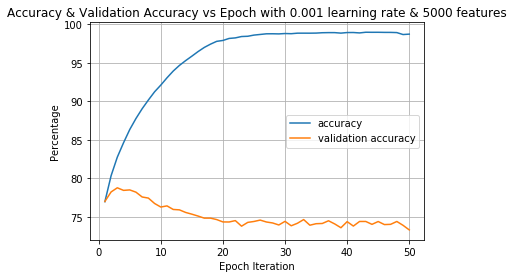

In [436]:
import matplotlib.pyplot as plt
%matplotlib inline

y_acc =  np.array(res.history['acc']) * 100
y_val_acc = np.array(res.history['val_acc']) *100
x_val = range(1,51)
plt.plot(x_val, y_acc, label='accuracy')
plt.plot(x_val, y_val_acc, label='validation accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch Iteration')
plt.ylabel('Percentage')
plt.title('Accuracy & Validation Accuracy vs Epoch with 0.001 learning rate & 5000 features')

Text(0.5,1,'Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features')

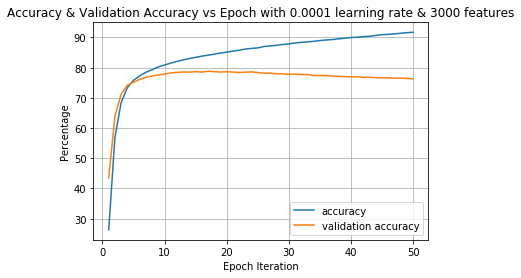

In [437]:
y_acc =  np.array(res2.history['acc']) * 100
y_val_acc = np.array(res2.history['val_acc']) *100
x_val = range(1,51)
plt.plot(x_val, y_acc, label='accuracy')
plt.plot(x_val, y_val_acc, label='validation accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch Iteration')
plt.ylabel('Percentage')
plt.title('Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features')

Text(0.5,1,'Accuracy & Validation Accuracy vs Epoch with 3 layer model 0.0001 learning rate & 3000 features')

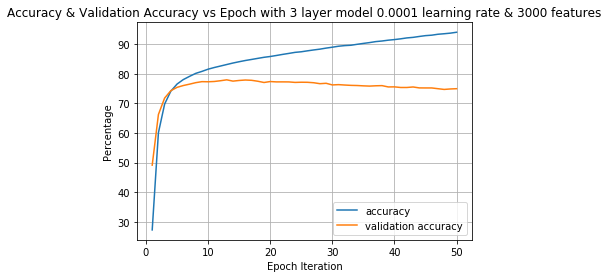

In [452]:
y_acc =  np.array(res3.history['acc']) * 100
y_val_acc = np.array(res3.history['val_acc']) *100
x_val = range(1,51)
plt.plot(x_val, y_acc, label='accuracy')
plt.plot(x_val, y_val_acc, label='validation accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch Iteration')
plt.ylabel('Percentage')
plt.title('Accuracy & Validation Accuracy vs Epoch with 3 layer model 0.0001 learning rate & 3000 features')

Text(0.5,1,'Final Model - Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features, batch -250')

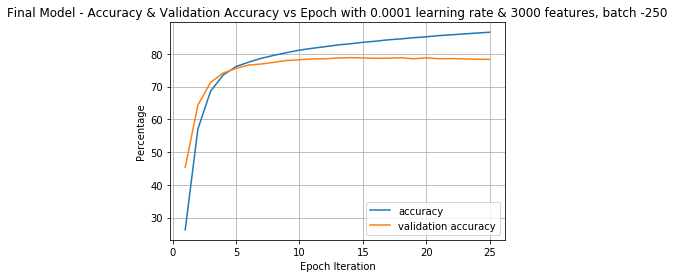

In [451]:
y_acc =  np.array(res_final.history['acc']) * 100
y_val_acc = np.array(res_final.history['val_acc']) *100
x_val = range(1,26)
plt.plot(x_val, y_acc, label='accuracy')
plt.plot(x_val, y_val_acc, label='validation accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch Iteration')
plt.ylabel('Percentage')
plt.title('Final Model - Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features, batch -250')

Text(0.5,1,'Predicting Subarea Using Area- Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features, batch -250')

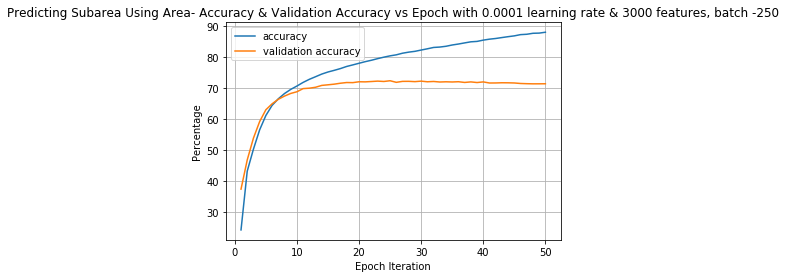

In [507]:
y_acc =  np.array(res_model_2.history['acc']) * 100
y_val_acc = np.array(res_model_2.history['val_acc']) *100
x_val = range(1,51)
plt.plot(x_val, y_acc, label='accuracy')
plt.plot(x_val, y_val_acc, label='validation accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch Iteration')
plt.ylabel('Percentage')
plt.title('Predicting Subarea Using Area- Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features, batch -250')

Text(0.5,1,'Predicting Subarea Without Area - Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features, batch -250')

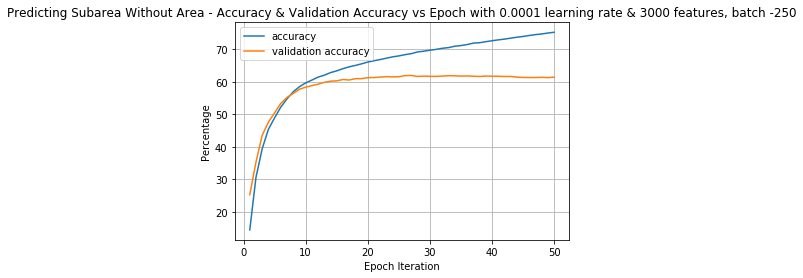

In [513]:
y_acc =  np.array(res_model_2_old.history['acc']) * 100
y_val_acc = np.array(res_model_2_old.history['val_acc']) *100
x_val = range(1,51)
plt.plot(x_val, y_acc, label='accuracy')
plt.plot(x_val, y_val_acc, label='validation accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch Iteration')
plt.ylabel('Percentage')
plt.title('Predicting Subarea Without Area - Accuracy & Validation Accuracy vs Epoch with 0.0001 learning rate & 3000 features, batch -250')

In [453]:
pred_res = model.predict_classes(test1_vector)

In [476]:
y1_train_predicted = model.predict_classes(train1_vector)
y1_train_predicted

array([ 6,  8,  6, ...,  1,  8, 44])

In [492]:
y1_test_predicted = model.predict_classes(test2_vector)

In [497]:
test2_vector_agg = csr_matrix(hstack((test2_vector,pd.get_dummies(y1_test_predicted))), shape=(test2_vector.shape[0],train2_vector_agg.shape[1]))
model_2.evaluate(test2_vector_agg, y2_test, batch_size=250, verbose=1)


16734/16734 [==============================] - 1s 88us/step


[3.0385895756762187, 0.5560535441786211]

In [518]:
model_2_old_3.evaluate(test2_vector, y2_test, batch_size=250, verbose=1)

16734/16734 [==============================] - 1s 81us/step


[1.5179848182980726, 0.604936061508698]

In [454]:
#loss 1.3 acc 72%
print(test1_vector.shape)
print(pred_res.shape)
print(y1_test.shape)
print(y1_train.shape)

model.evaluate(test1_vector, y1_test, batch_size=500, verbose=1)

(16734, 3000)
(16734,)
(16734, 49)
(66936, 49)
16734/16734 [==============================] - 1s 64us/step


[0.7737412572947115, 0.7791920702873741]

In [519]:
def save_model(model , json_file, h5_file):
    # serialize model to JSON
    model_json = model.to_json()
    with open(json_file, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(h5_file)
    print("Saved model to disk")
    
print('Saving models')
save_model(model, 'gm_model1.json', 'gm_model1.h5')
save_model(model_2_old_3, 'gm_model2.json', 'gm_model2.h5')
print('Saved models')

Saving models
Saved model to disk
Saved model to disk
Saved models


In [599]:
def read_test_data(f1=None,f2=None,f3=None):
    test_cons = pd.DataFrame()
    if f1 is not None:
        s1 = pd.read_csv(f1, encoding='ISO-8859-1')
        s1 = s1.assign(source_type=1)
        test_cons = s1[['ID_val','customer_verbatim','causal_verbatim', 'corrective_verbatim','source_type']]
    
    if f2 is not None: 
        s2 = pd.read_csv(f2)
        s2 = s2.assign(source_type=2)
#         print(s2.columns)
        s2_new = s2.rename({'Verb_English': 'customer_verbatim', 'Problem':'problem','Checkbox':'checkbox','Complaint_Type':'complaint'}, axis = 1)
#         print(s2_new.columns)
        test_cons = test_cons.append(s2_new[['ID_val','customer_verbatim', 'problem','checkbox','complaint','source_type']], sort=True, ignore_index=True)

    if f3 is not None:        
        s3 = pd.read_csv(f3)
        s3 = s3.assign(source_type=3)
        s3_new = s3.rename({'Verbatim':'customer_verbatim'}, axis=1)
        test_cons = test_cons.append(s3_new[['ID_val','customer_verbatim','source_type']], sort = True, ignore_index=True)
    
    print('Building clean data')
    test_cons = test_cons.fillna('')
    test_cons['sentence'] = test_cons['customer_verbatim']
    if f1 is not None:
        test_cons['sentence'] = test_cons['sentence'] + test_cons['causal_verbatim']+ ' ' + test_cons['corrective_verbatim']
    
    if f2 is not None:
        test_cons['sentence'] =  test_cons['sentence'] + ' ' + test_cons['problem']+ ' ' + test_cons['checkbox']+ ' ' + test_cons['complaint']
    test_cons['sentence'] = test_cons['sentence'].apply(clean_data)
    print('Built data')
    return test_cons

test_cons_1 = read_test_data(f1='Source_1_validation_sample.csv')
test_cons_2 = read_test_data(f2='Source_2_validation_sample.csv')
test_cons_3 = read_test_data(f3='Source_3_validation_sample.csv')

Building clean data
Built data
Building clean data
Built data
Building clean data
Built data


In [601]:
def get_prediction(test_cons):
    test_pred_area  = model.predict_classes(vectorizer.transform(test_cons['sentence']))
    test_pred_subarea  = model_2_old_3.predict_classes(vectorizer2.transform(test_cons['sentence']))
    test_pred_df = pd.DataFrame(test_pred_area, columns=['pred_area'])
    test_pred_df['pred_subarea'] = test_pred_subarea
    test_pred_df['area'] = [y1_str[n] for n in test_pred_df['pred_area']]
    test_pred_df['subarea'] = [y2_str[n] for n in test_pred_df['pred_subarea']]
    test_pred_df['ID_val'] = test_cons['ID_val']
    return test_pred_df.drop(columns=['pred_area','pred_subarea'])

pred_1 = get_prediction(test_cons_1)
pred_2 = get_prediction(test_cons_2)
pred_3 = get_prediction(test_cons_3)

In [602]:
pred_1.to_csv('pred_1.csv')
pred_2.to_csv('pred_2.csv')
pred_3.to_csv('pred_3.csv')

In [589]:
assert test_cons_1.shape[0] == pred_1.shape[0]
assert test_cons_2.shape[0] == pred_2.shape[0]
assert test_cons_3.shape[0] == pred_3.shape[0]

In [604]:
assert pred_1.shape[0] == len(pd.read_csv('Source_1_validation_sample.csv', encoding='ISO-8859-1'))
assert pred_2.shape[0] == len(pd.read_csv('Source_2_validation_sample.csv', encoding='ISO-8859-1'))
assert pred_3.shape[0] == len(pd.read_csv('Source_3_validation_sample.csv', encoding='ISO-8859-1'))

In [546]:
y1_encoding, y1_str = pd.factorize(consolidated_new['area'])
y2_encoding, y2_str = pd.factorize(consolidated_new['subarea'])

In [564]:
y1_str[0]

'Audio'

In [21]:
defects = pd.read_csv('BlackTop-Defects-Student.csv', encoding='ISO-8859-1')
defects_matrix = vectorizer.transform(defects['Summary'].apply(clean_data))

In [22]:
train1_vector.shape

(66936, 3000)

In [23]:
defects_matrix.shape

(836, 3000)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(train1_vector, defects_matrix)

array([[0.        , 0.        , 0.        , ..., 0.06695287, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01869087, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01450281, ..., 0.04862132, 0.02470654,
        0.01087709],
       [0.07967313, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
import numpy as np
def cal_d(t, vector, defects_matrix):
    if t%100 == 0:
        print(t)
    distances = np.array([])
    for i in range(0,defects_matrix.shape[0]):
        d = cosine_similarity(vector, defects_matrix[i])
        distances = np.append(distances, d[0][0])
    return np.argmax(np.array(distances))

closest = np.array([cal_d(t, train1_vector[t], defects_matrix) for t in range(0,train1_vector.shape[0])])

    

0
100
200


In [29]:
top_10 = set(consolidated['area'].value_counts()[:10].index.values)

In [41]:
consolidated['area'].value_counts()[:10]

3     17642
1      9315
0      6105
2      5572
15     5112
44     4723
8      3727
7      2981
13     2975
6      2920
Name: area, dtype: int64

In [29]:
defects['class'], defects_str = pd.factorize(defects['Component'])
defects['class']

0       0
1       1
2       1
3       0
4       2
5       1
6       0
7       2
8       3
9       4
10      0
11      0
12      5
13      0
14      0
15      5
16      0
17      2
18      1
19      0
20      1
21      0
22      4
23      4
24      0
25      2
26      4
27      4
28      2
29      5
       ..
806     6
807     1
808     5
809     5
810     5
811     0
812     2
813     0
814     2
815     0
816     2
817     5
818     4
819     0
820     1
821     2
822     1
823     2
824     2
825     4
826     0
827     0
828     2
829     1
830    10
831     2
832     4
833     5
834     2
835     2
Name: class, Length: 836, dtype: int64

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
clf = clf.fit(defects_matrix, pd.get_dummies(defects['class']))

In [67]:
pd.get_dummies(defects['class'])

<836x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 5861 stored elements in Compressed Sparse Row format>

In [46]:
clf.predict(train1_vector[0])

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=uint8)

In [81]:
closest = clf.predict(train1_vector)

In [61]:
defects['class'].value_counts()

2     206
0     202
4     111
5     100
1      98
6      65
3      21
11      5
8       4
14      4
9       4
7       2
20      2
13      2
16      2
18      2
10      2
19      1
12      1
15      1
17      1
Name: class, dtype: int64

In [59]:
defects

,Identifier,Summary,Component,Classification,class
0,1,[ZZ99_CChips] Failed to mount USB stick during...,System,NaN,0
1,2,PTT press during CarPlay Siri session ends Siri,Projection/CarPlay,NaN,1
2,3,[CP Cert]- Jog events from MFC are not reporte...,Projection/CarPlay,NaN,1
3,4,[ZZ99_CChips]CSM is not reboot automatically a...,System,NaN,0
4,5,[ZZ99] A contact which contains many phone num...,Connectivity/Bluetooth,NaN,2
5,6,"[ZZ99_CChips]After reconnect the carplay, the ...",Projection/CarPlay,NaN,1
6,7,[CCC]Writable gpio440 and gpio463 files found ...,System,NaN,0
7,8,[ZZ99_CChips][F1K][Stress Test] Recents are no...,Connectivity/Bluetooth,NaN,2
8,9,[ZZ99_CChips]The BT media canÕt playing after ...,Multimedia/Audio APP (Multimedia),NaN,3
9,10,Android auto consent will disappear when the c...,Projection,NaN,4


In [82]:
[np.nonzero(closest[k]) for k in range(0,train1_vector.shape[0])]

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([0]),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([0]),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([0]),),
 (array([], dtype=int64),),
 (array([6]),),
 (array([0]),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([4]),),
 (array([0]),),
 (array([5]),),
 (array([0]),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([0]),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),


In [105]:
pred_cls = [defects_str[np.nonzero(closest[k])[0]] for k in range(0,train1_vector.shape[0])]
pred_cls.append(pred_cls[len(pred_cls)-1])
top10_res = np.array(pred_cls)
top10_res

array([Index([], dtype='object'), Index([], dtype='object'),
       Index(['System'], dtype='object'), ...,
       Index(['System'], dtype='object'), Index([], dtype='object'),
       Index([], dtype='object')], dtype=object)

In [108]:
X1_df = X1_df[[len(x.values)!=0 for x in X1_df['res']]]
X1_df['class'] = np.array([x.values[0] for x in X1_df['res']])


In [110]:
len(X1_df)

24464

In [106]:
X1_df = pd.DataFrame(X1_train)
X1_df['res'] = top10_res
X1_df

,sentence,res
7950,ecu failur dtc diagnosi radio replac configure...,"Index([], dtype='object')"
75145,worst locat took forev find inconveni oper locat,"Index([], dtype='object')"
43922,tech found radio freez per tac replac found ra...,"Index(['System'], dtype='object')"
56698,no navig unless use onstar bought upgrad vehic...,"Index([], dtype='object')"
72568,larger easi find se,"Index([], dtype='object')"
4368,cabl replac found radio not lock radio screen ...,"Index([], dtype='object')"
60826,rear camera horribl resolution upgrad camera r...,"Index([], dtype='object')"
1580,reset reset radio display custom state radio s...,"Index(['System'], dtype='object')"
57260,clock dtu control poor locat clock poor locat ...,"Index([], dtype='object')"
71666,cant figur account traffic not copi fcd occasi...,"Index([], dtype='object')"


66936

In [34]:
closest = np.array([clf.predict(train1_vector[t]) for t in range(0,train1_vector.shape[0])])

KeyboardInterrupt: 

In [37]:
consolidated[[k in top_10 for k in consolidated['area']]]

61072